In [106]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [133]:
movie_file = pd.read_csv("C:/Users/Hp/Desktop/CODSOFT/TASK 2 Movie Rating Prediction with Python/IMDb Movies India.csv", encoding='latin1')

In [134]:
movie_file

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
movie_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [136]:
movie_file.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [137]:
movie_file.shape

(15509, 10)

In [138]:
movie_file.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [139]:
movie_file.dropna(inplace=True)

In [140]:
movie_file.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [141]:
movie_file.shape

(5659, 10)

In [142]:
movie_file['Duration'] = movie_file['Duration'].str.extract('(\d+)')
movie_file['Duration'] = pd.to_numeric(movie_file['Duration'], errors='coerce')

In [143]:
movie_file["Year"].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [144]:
genre = movie_file['Genre']

In [145]:
genre.head(11)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
Name: Genre, dtype: object

In [146]:
genres = movie_file['Genre'].str.split(', ', expand=True)

In [147]:
genres.head()

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [148]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [149]:
genresPie = movie_file['Genre'].value_counts()

In [150]:
genresPie.head(11)

Genre
Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Action, Comedy, Drama     118
Name: count, dtype: int64

In [151]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [152]:
genrePie.head()

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [153]:
movie_file['Votes'] = movie_file['Votes'].str.replace(',', '').astype(int)

In [154]:
movie_file['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [155]:
movie_file["Director"].nunique()

2431

In [156]:
directors = movie_file["Director"].value_counts()

In [157]:
directors.head(11)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
Name: count, dtype: int64

In [158]:
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']]).dropna().value_counts()

In [159]:
actors.head()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Name: count, dtype: int64

In [160]:
movie_file['Year'] = movie_file['Year'].astype(str).str.extract(r'(\d{4})')[0].astype(int)

In [161]:
sb.set(style = "darkgrid", font = "Calibri")

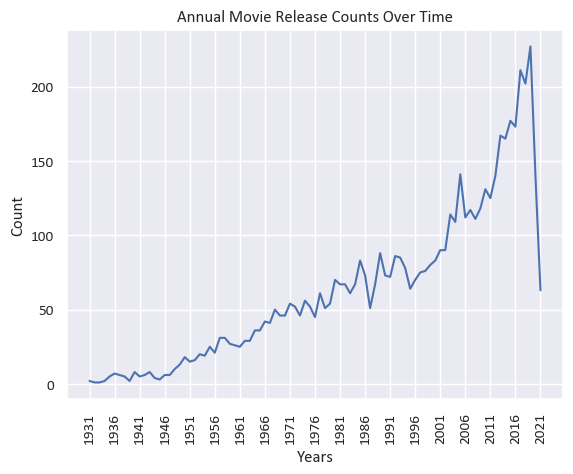

In [162]:
ax = sb.lineplot(x=movie_file['Year'].value_counts().sort_index().index, 
                 y=movie_file['Year'].value_counts().sort_index().values)

ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Count")

darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)

plt.show()

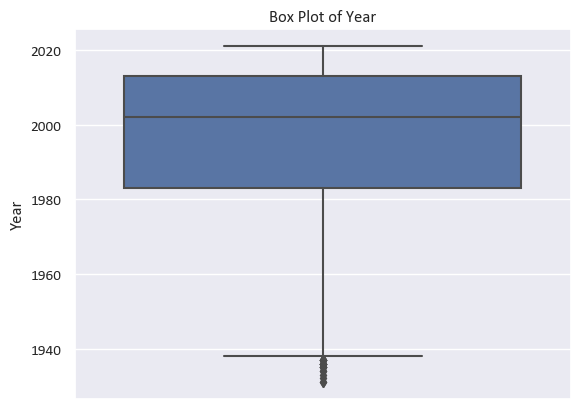

In [163]:
ax = sb.boxplot(data=movie_file, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

[Text(1931, 0, '1931'),
 Text(1936, 0, '1936'),
 Text(1941, 0, '1941'),
 Text(1946, 0, '1946'),
 Text(1951, 0, '1951'),
 Text(1956, 0, '1956'),
 Text(1961, 0, '1961'),
 Text(1966, 0, '1966'),
 Text(1971, 0, '1971'),
 Text(1976, 0, '1976'),
 Text(1981, 0, '1981'),
 Text(1986, 0, '1986'),
 Text(1991, 0, '1991'),
 Text(1996, 0, '1996'),
 Text(2001, 0, '2001'),
 Text(2006, 0, '2006'),
 Text(2011, 0, '2011'),
 Text(2016, 0, '2016'),
 Text(2021, 0, '2021')]

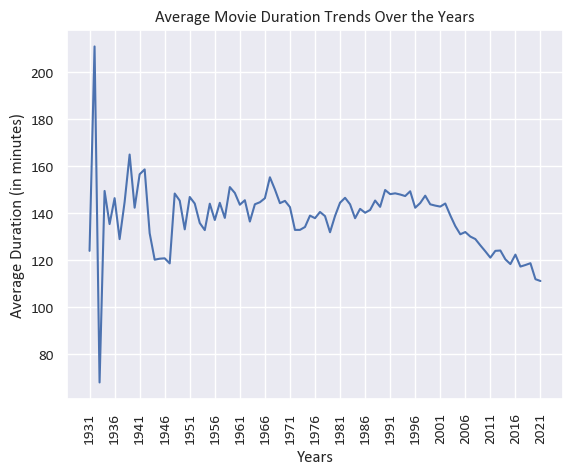

In [164]:
ax = sb.lineplot(data=movie_file.groupby('Year')['Duration'].mean().reset_index(), 
                 x='Year', y='Duration')

ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel("Average Duration (in minutes)")

darkgrid_positions = range(int(movie_file['Year'].min()), int(movie_file['Year'].max()) + 1, 5)
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)

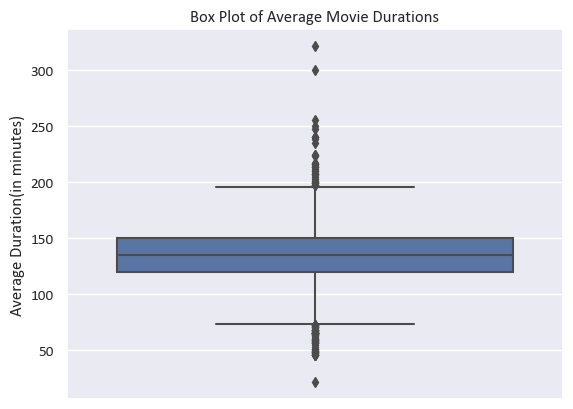

In [165]:
ax = sb.boxplot(data=movie_file, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [166]:
Q1 = movie_file['Duration'].quantile(0.25)
Q3 = movie_file['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = movie_file[(movie_file['Duration'] >= lower_bound) & (movie_file['Duration'] <= upper_bound)]
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


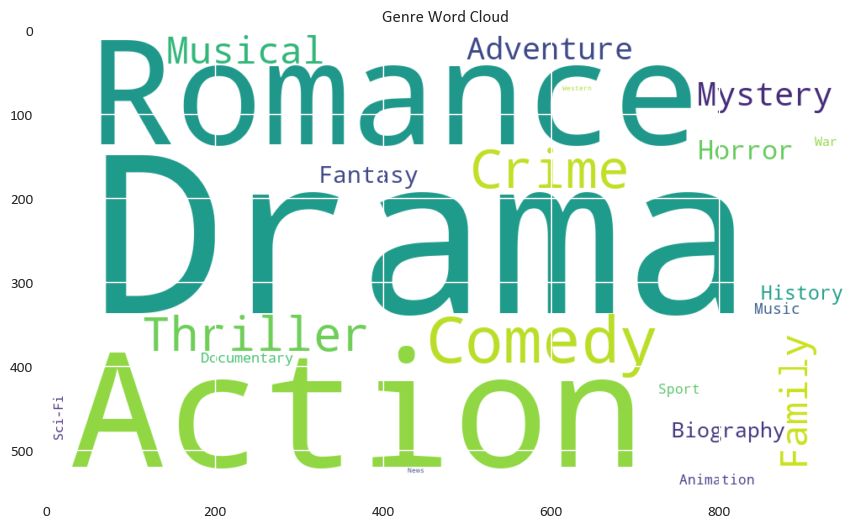

In [167]:
genre_counts = movie_file['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Genre Word Cloud')
plt.show()

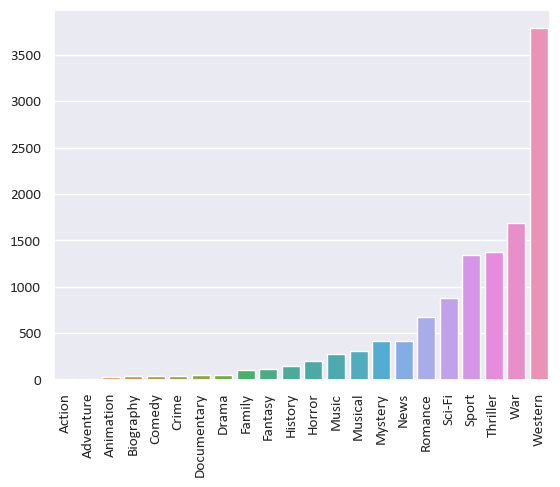

In [168]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(genreLabels, rotation=90)
plt.show()

In [169]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

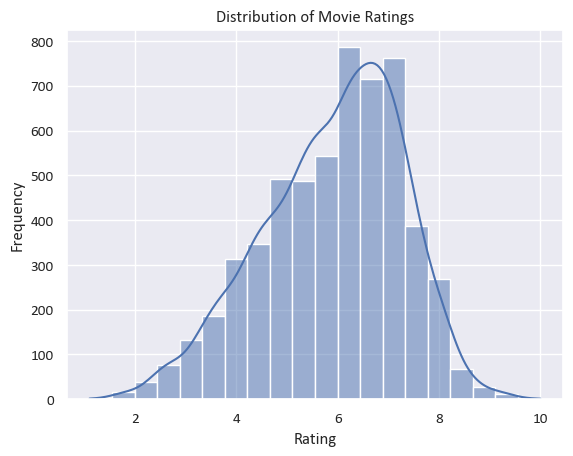

In [170]:
ax = sb.histplot(data = movie_file, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

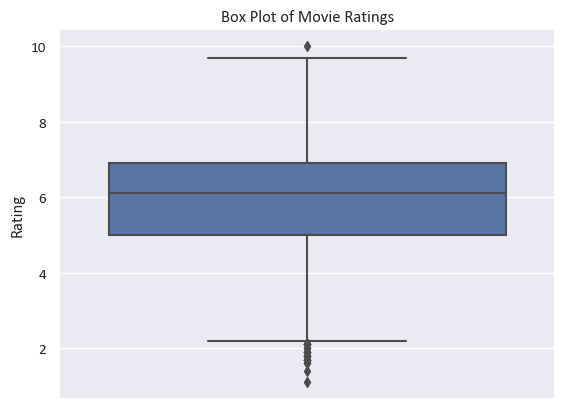

In [171]:
ax = sb.boxplot(data=movie_file, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
plt.show()

In [172]:
Q1 = movie_file['Rating'].quantile(0.25)
Q3 = movie_file['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Rating'] >= lower_bound) & (movie_file['Rating'] <= upper_bound)]
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


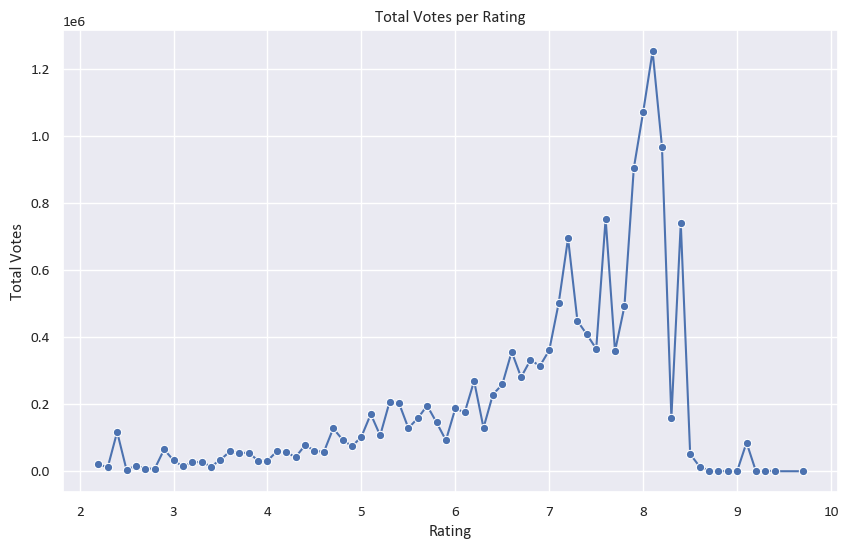

In [173]:
rating_votes = movie_file.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

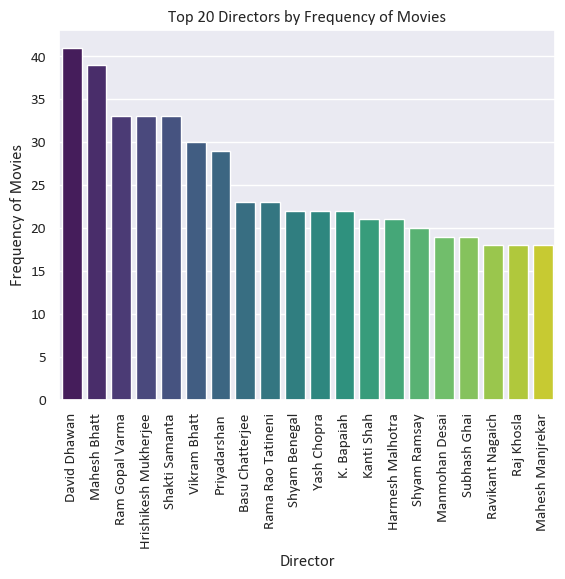

In [174]:
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_ylabel("Frequency of Movies")
ax.set_title("Top 20 Directors by Frequency of Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

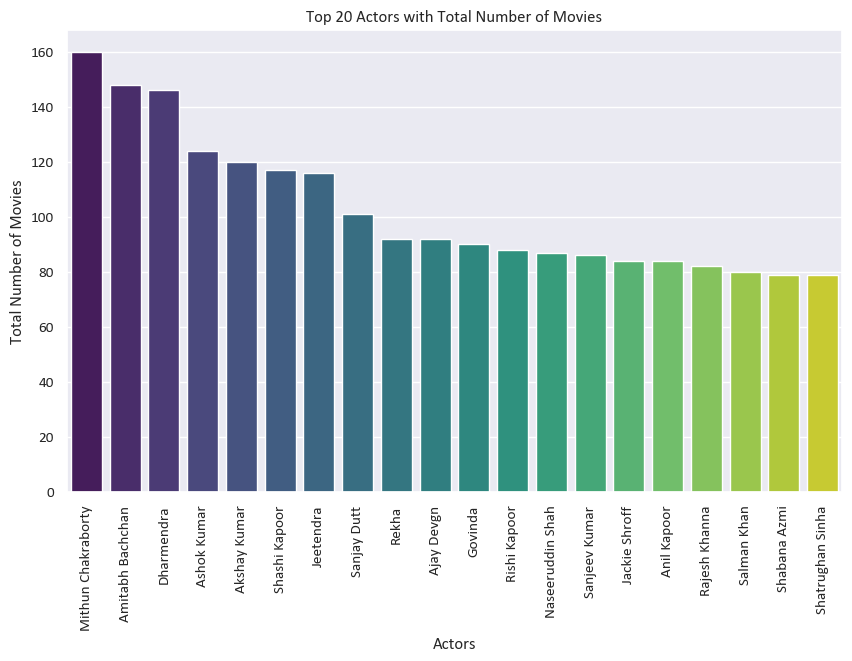

In [175]:
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [176]:
movie_file["Actor"] = movie_file['Actor 1'] + ', ' + movie_file['Actor 2'] + ', ' + movie_file['Actor 3']
movie_file["Directors"] = movie_file['Director'].astype('category').cat.codes
movie_file["Genres"] = movie_file['Genre'].astype('category').cat.codes
movie_file["Actors"] = movie_file['Actor'].astype('category').cat.codes

C:\Users\Hp\AppData\Local\Temp\ipykernel_19828\1713399763.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\AppData\Local\Temp\ipykernel_19828\1713399763.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\AppData\Local\Temp\ipykernel_19828\1713399763.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [177]:
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


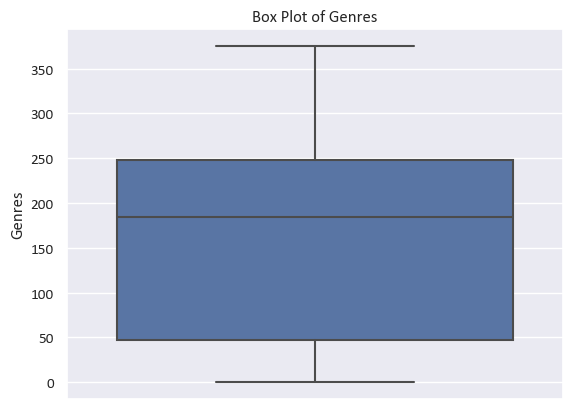

In [178]:
ax = sb.boxplot(data=movie_file, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
plt.show()

In [179]:
Q1 = movie_file['Genres'].quantile(0.25)
Q3 = movie_file['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Genres'] >= lower_bound) & (movie_file['Genres'] <= upper_bound)]

In [180]:
movie_file.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


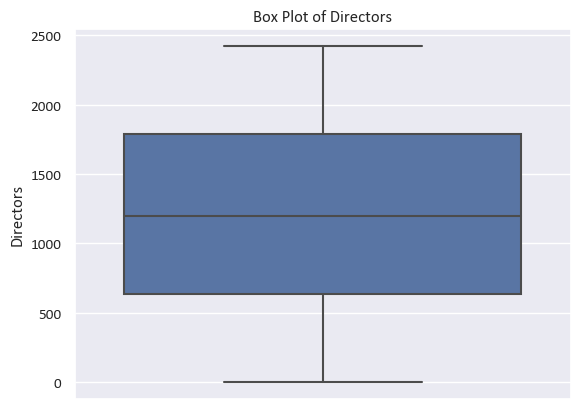

In [181]:
ax = sb.boxplot(data=movie_file, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
plt.show()

In [182]:
Q1 = movie_file['Directors'].quantile(0.25)
Q3 = movie_file['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Directors'] >= lower_bound) & (movie_file['Directors'] <= upper_bound)]

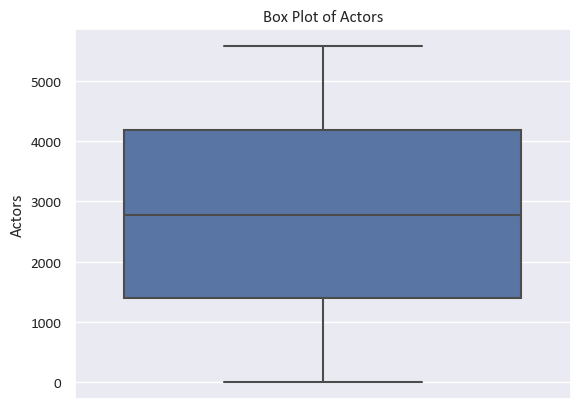

In [183]:
ax = sb.boxplot(data=movie_file, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
plt.show()

In [184]:
Q1 = movie_file['Actors'].quantile(0.25)
Q3 = movie_file['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Actors'] >= lower_bound) & (movie_file['Actors'] <= upper_bound)]

In [185]:
movie_file.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


In [186]:
Input = movie_file.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = movie_file['Rating']

In [187]:
Input.head(10)

,Year,Duration,Votes,Directors,Genres,Actors
1,2019,109,8,629,229,3858
3,2019,110,35,1334,184,3326
5,1997,147,827,1527,157,1112
6,2005,142,1086,2037,289,2075
8,2012,82,326,135,320,5535
9,2014,116,11,401,37,967
10,2004,96,17,1083,229,3863
11,2016,120,59,266,316,3213
12,1991,161,983,1373,323,1890
13,2012,166,512,1503,159,1971


In [188]:
Output.head(10)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
Name: Rating, dtype: float64

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    Input, Output, test_size=0.2, random_state=42
)
print(len(y_test), len(X_test)) 

1127 1127


In [190]:
print(len(y_test), len(X_test))

1127 1127


In [191]:
movie_file.drop('Name', axis = 1, inplace = True)

In [192]:
genre_avg_rating = movie_file.groupby('Genre')['Rating'].transform('mean')
movie_file['Genre_avg_rating'] = genre_avg_rating

director_avg_rating = movie_file.groupby('Director')['Rating'].transform('mean')
movie_file['Director_avg_rating'] = director_avg_rating

actor1_avg_rating = movie_file.groupby('Actor 1')['Rating'].transform('mean')
movie_file['Actor1_avg_rating'] = actor1_avg_rating

actor2_avg_rating = movie_file.groupby('Actor 2')['Rating'].transform('mean')
movie_file['Actor2_avg_rating'] = actor2_avg_rating

actor3_avg_rating = movie_file.groupby('Actor 3')['Rating'].transform('mean')
movie_file['Actor3_avg_rating'] = actor3_avg_rating

In [193]:
X = movie_file[[ 'Year', 'Votes', 'Duration', 'Genre_avg_rating','Director_avg_rating','Actor1_avg_rating', 'Actor2_avg_rating',
        'Actor3_avg_rating']]
y = movie_file['Rating']

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [195]:
X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_test = X_test.dropna()

In [196]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_model = linear.predict(X_test)

# Decision Tree Regressor
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, y_train)
DTree_model = DTree.predict(X_test)

# Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
RF_model = RF.predict(X_test)

# XGBoost Regressor (Fixed `random_state` issue)
XGBR = XGBRegressor(n_estimators=100, seed=42)  # `seed` is used instead of `random_state`
XGBR.fit(X_train, y_train)
XGBR_model = XGBR.predict(X_test)

# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)
GBR.fit(X_train, y_train)
GBR_model = GBR.predict(X_test)

# Support Vector Regressor
SVRM = SVR(kernel='rbf')
SVRM.fit(X_train, y_train)
SVR_model = SVRM.predict(X_test)

# K-Nearest Neighbors Regressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)
KNN_model = KNN.predict(X_test)

In [197]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [198]:
LRScore = evaluate_model(y_test, linear_model, "Linear Regression")
RFScore = evaluate_model(y_test, RF_model, "Random Forest")
DTreeScore = evaluate_model(y_test, DTree_model, "Decision Tree Regression")
XGBScore = evaluate_model(y_test, XGBR_model, "Extended Gradient Boosting")
GBScore = evaluate_model(y_test, GBR_model, "Gradient Boosting")
SVRScore = evaluate_model(y_test, SVR_model, "Support Vector Regression")
KNNScore = evaluate_model(y_test, KNN_model, "K Nearest Neighbors")

Model:  Linear Regression
Accuracy = 749.88%
Mean Squared Error = 0.66

Model:  Random Forest
Accuracy = 810.94%
Mean Squared Error = 0.58

Model:  Decision Tree Regression
Accuracy = 625.44%
Mean Squared Error = 0.81

Model:  Extended Gradient Boosting
Accuracy = 808.01%
Mean Squared Error = 0.58

Model:  Gradient Boosting
Accuracy = 811.79%
Mean Squared Error = 0.57

Model:  Support Vector Regression
Accuracy = 46.22%
Mean Squared Error = 1.29

Model:  K Nearest Neighbors
Accuracy = 309.12%
Mean Squared Error = 1.10



In [201]:
Linear_MSE = round(mean_squared_error(y_test,linear_model),2)
RF_MSE = round(mean_squared_error(y_test,RF_model),2)
DTree_MSE = round(mean_squared_error(y_test,DTree_model),2)
XGB_MSE = round(mean_squared_error(y_test,XGBR_model),2)
GB_MSE = round(mean_squared_error(y_test,GBR_model),2)
SVR_MSE = round(mean_squared_error(y_test,SVR_model),2)
KNN_MSE = round(mean_squared_error(y_test,KNN_model),2)

In [202]:
models = pd.DataFrame(
    {
        "Regression Models": ["Linear Regression", "Random Forest", "Decision Tree Regression", "Extended Gradient Boosting",
                   "Gradient Boosting", "Support Vector Regression", "K Nearest Neighbors"],
        "Accuracy Scores": [LRScore, RFScore, DTreeScore, XGBScore, GBScore, SVRScore, KNNScore],
        "MSE": [Linear_MSE,RF_MSE,DTree_MSE,XGB_MSE,GB_MSE,SVR_MSE,KNN_MSE]
    }
)
models.sort_values(by='Accuracy Scores', ascending=False).reset_index(drop=True)

,Regression Models,Accuracy Scores,MSE
0,Gradient Boosting,811.79,0.33
1,Random Forest,810.94,0.33
2,Extended Gradient Boosting,808.01,0.34
3,Linear Regression,749.88,0.44
4,Decision Tree Regression,625.44,0.66
5,K Nearest Neighbors,309.12,1.21
6,Support Vector Regression,46.22,1.67


In [203]:
X.head()

,Year,Votes,Duration,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
1,2019,8,109,6.431986,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82,5.477778,5.600000,5.600000,5.883333,5.600000


In [206]:
Year = int(input('Enter the Year: '))
Votes = int(input('Enter the number of Votes: '))
Duration = int(input('Enter the Duration in minutes: '))
Genre_avg_rating = float(input('Enter the Average Rating of Genre: '))
Director_avg_rating = float(input('Enter the Average Rating of Director: '))
Actor1_avg_rating = float(input('Enter the Average Rating of Actor1: '))
Actor2_avg_rating = float(input('Enter the Average Rating of Actor2: '))
Actor3_avg_rating = float(input('Enter the Average Rating of Actor3: '))

# Generate unseen data accordingly with inputs
input_list = [Year, Votes, Duration, Genre_avg_rating, Director_avg_rating, Actor1_avg_rating, Actor2_avg_rating, 
              Actor3_avg_rating]

Enter the Year: 2019
Enter the number of Votes: 35
Enter the Duration in minutes: 110
Enter the Average Rating of Genre: 5.729
Enter the Average Rating of Director: 4.400
Enter the Average Rating of Actor1: 5.250
Enter the Average Rating of Actor2: 4.40
Enter the Average Rating of Actor3: 4.46


In [208]:
feature_names = X_train.columns 
input_df = pd.DataFrame([input_list], columns=feature_names)
predicted_rating = RF.predict(input_df)

print("Predicted Rating:", round(predicted_rating[0], 1))

Predicted Rating: 4.4
